In [1]:
# 2nd March 2023

In [2]:
import random, numpy as np, pandas as pd, os, glob, nltk

import re
import os.path
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer

SEED = 420

random.seed(SEED); np.random.seed(SEED)

In [3]:
nltk.download(['book'])

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/kalamari/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /home/kalamari/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /home/kalamari/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/kalamari/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /home/kalamari/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /home/kalamari/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    |

True

In [4]:
from nltk.corpus import PlaintextCorpusReader

lyrics_corpus_path = 'lyrics'

corpus = PlaintextCorpusReader(lyrics_corpus_path, '.*\.txt')

print(f'{corpus.fileids()}')

song = corpus.words('two-of-us.txt')
song

['12-bar-original.txt', '1822.txt', 'Anna-go-to-him.txt', 'I-saw-her-standing-there.txt', 'There-s-a-place.txt', 'a-beginning.txt', 'a-day-in-the-life-live-in-amsterdam.txt', 'a-day-in-the-life.txt', 'a-hard-days-night.txt', 'a-little-rhyme.txt', 'a-shot-of-rhythm-and-blues.txt', 'a-taste-of-honey.txt', 'across-the-universe.txt', 'act-naturally.txt', 'ain-t-she-sweet.txt', 'all-ive-got-to-do.txt', 'all-my-loving.txt', 'all-things-must-pass.txt', 'all-together-now.txt', 'all-you-need-is-love.txt', 'and-i-love-her.txt', 'and-your-bird-can-sing.txt', 'another-girl.txt', 'ask-me-why.txt', 'baby-its-you.txt', 'baby-youre-a-rich-man.txt', 'babys-in-black.txt', 'back-in-the-ussr.txt', 'bad-boy.txt', 'beatle-greetings.txt', 'because.txt', 'being-for-the-benefit-of-mr-kite.txt', 'besame-mucho.txt', 'birthday.txt', 'blackbird.txt', 'blue-jay-way.txt', 'boys.txt', 'cant-buy-me-love.txt', 'carol.txt', 'carry-that-weight.txt', 'cayenne.txt', 'chains.txt', 'clarabella.txt', 'come-together.txt', 'cri

['Two', 'of', 'us', 'riding', 'nowhere', 'spending', ...]

In [5]:
print(len(corpus.fileids()))

# get a list of all file names in the corpus directory
all_files = corpus.fileids()

# create a new list to hold the files with words
files_with_words = []

# loop through each file in the corpus
for file in all_files:
    # read in the file contents
    file_contents = corpus.raw(file)
    # tokenize the file contents into words
    words = word_tokenize(file_contents)
    # check if the file contains any words
    if len(words) > 10:
        # add the file to the list of files with words
        files_with_words.append(file)

# create a new corpus object with only the files with words
corpus = PlaintextCorpusReader(lyrics_corpus_path, files_with_words)


# Print the number of files remaining in the corpus
print(len(corpus.fileids()))

279
218


In [6]:
from nltk import FreqDist

def corpus_info(corpus):
    """
    Prints out information about the status of a corpus.
    """
    fids   = len(corpus.fileids())
    paras  = len(corpus.paras())
    sents  = len(corpus.sents())
    sperp  = sum(len(para) for para in corpus.paras()) / float(paras)
    tokens = FreqDist(corpus.words())
    count  = sum(tokens.values())
    vocab  = len(tokens)
    lexdiv = float(count) / float(vocab)

    print((
        "Text corpus contains {} files\n"
        "Composed of {} paragraphs and {} sentences.\n"
        "{:0.3f} sentences per paragraph\n"
        "Word count of {} with a vocabulary of {}\n"
        "lexical diversity is {:0.3f}"
    ).format(
        fids, paras, sents, sperp, count, vocab, lexdiv
    ))

In [7]:
corpus_info(corpus)

Text corpus contains 218 files
Composed of 311 paragraphs and 541 sentences.
1.740 sentences per paragraph
Word count of 45253 with a vocabulary of 2961
lexical diversity is 15.283


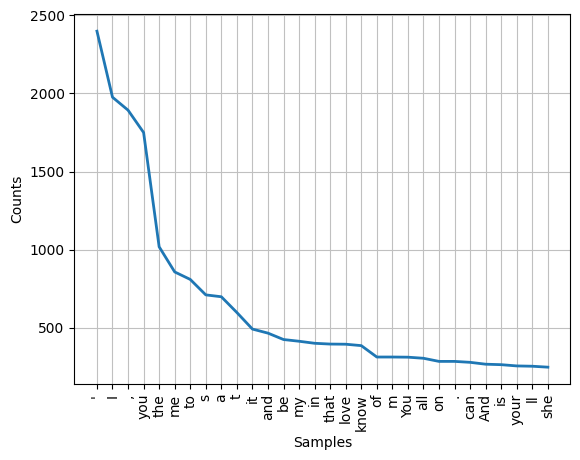

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [8]:
# Quick frequency distribution
from nltk.probability import FreqDist

fdist = FreqDist(corpus.words())
fdist.plot(30, cumulative=False)

In [9]:
def filters(input_string):
    stopwords = nltk.corpus.stopwords.words('english') #nltk stopwords 
    punct_tokenizer = nltk.RegexpTokenizer(r"\w+") #catch punct at tokenizing stage 
    
    text_lower = input_string.lower() #lower everything 
    
    text_tokenised = punct_tokenizer.tokenize(text_lower) #tokenize string
    text_clean = [w for w in text_tokenised if w not in stopwords] #remove stopwords
    text_clean_3 = TreebankWordDetokenizer().detokenize(text_clean) #detokenize to get clean string back 
    text_clean_4 = re.sub('’|‘|–|“|”|…|—|dâm', '', text_clean_3) # catch loose bits
    text_clean_5 = re.sub(r'\d+', '', text_clean_4) #remove numbers
    text_clean_6 = re.sub(r'\ss\s', '', text_clean_5) #remove trailing s's 
    text_final = ' '.join(text_clean_6.split()) #strip whitespace
    return text_final

In [10]:
def export_corpus(input_corpus):
    for d in input_corpus.fileids():
        clean_string = filters(input_corpus.raw(d))
        filename = d
        filepath = os.path.join('cleaned_lyrics/', filename)
        outfile = open(filepath, 'w')
        outfile.write(clean_string)
        outfile.close()
    return 'Process complete!'

In [11]:
export_corpus(corpus)

'Process complete!'

In [12]:
from nltk.corpus import PlaintextCorpusReader

lyrics_corpus_path = 'cleaned_lyrics/'

cleaned_corpus = PlaintextCorpusReader(lyrics_corpus_path, '.*\.txt')

print(f'{cleaned_corpus.fileids()}')

song = cleaned_corpus.words('two-of-us.txt')
song

['Anna-go-to-him.txt', 'I-saw-her-standing-there.txt', 'There-s-a-place.txt', 'a-day-in-the-life-live-in-amsterdam.txt', 'a-day-in-the-life.txt', 'a-hard-days-night.txt', 'a-taste-of-honey.txt', 'across-the-universe.txt', 'act-naturally.txt', 'ain-t-she-sweet.txt', 'all-ive-got-to-do.txt', 'all-my-loving.txt', 'all-things-must-pass.txt', 'all-together-now.txt', 'all-you-need-is-love.txt', 'and-i-love-her.txt', 'and-your-bird-can-sing.txt', 'another-girl.txt', 'ask-me-why.txt', 'baby-its-you.txt', 'baby-youre-a-rich-man.txt', 'babys-in-black.txt', 'back-in-the-ussr.txt', 'bad-boy.txt', 'because.txt', 'being-for-the-benefit-of-mr-kite.txt', 'besame-mucho.txt', 'birthday.txt', 'blackbird.txt', 'blue-jay-way.txt', 'boys.txt', 'cant-buy-me-love.txt', 'carry-that-weight.txt', 'chains.txt', 'come-together.txt', 'cry-baby-cry.txt', 'day-tripper.txt', 'dear-prudence.txt', 'devil-in-her-heart.txt', 'dig-a-pony.txt', 'dizzy-miss-lizzy.txt', 'do-you-want-to-know-a-secret.txt', 'doctor-robert.txt',

['two', 'us', 'riding', 'nowhere', 'spending', ...]

In [13]:
corpus_info(cleaned_corpus)

Text corpus contains 218 files
Composed of 218 paragraphs and 218 sentences.
1.000 sentences per paragraph
Word count of 18529 with a vocabulary of 2381
lexical diversity is 7.782


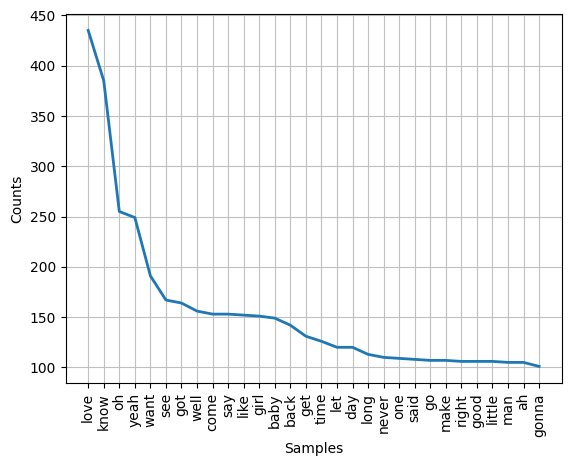

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [14]:
fdist = FreqDist(cleaned_corpus.words())
fdist.plot(30, cumulative=False)

In [15]:
fdist.most_common(10)

[('love', 435),
 ('know', 385),
 ('oh', 255),
 ('yeah', 249),
 ('want', 191),
 ('see', 167),
 ('got', 164),
 ('well', 156),
 ('come', 153),
 ('say', 153)]

In [16]:
print(f'Raw:\n{corpus.raw("another-girl.txt")[0:250]}')

Raw:
For I have got another girl, another girl
You're making me say that I've got nobody but you
But as from today well I've got somebody that's new
I ain't no fool and I don't take what I don't want
For I have got another girl, another girl
She's sweeter


In [17]:
print(f'Cleaned:\n{cleaned_corpus.raw("another-girl.txt")[0:250]}')

Cleaned:
got another girl another girl making say got nobody today well got somebody new fool take want got another girl another girl sweeter girls met quite nobody world telling time better stop got another girl another girl love till end thick thin always f


In [18]:
nltk.download(['wordnet','omw-1.4'])

lemmatizer = WordNetLemmatizer()
#lemmatize and export cleaned corpus
def lemma_corpus(input_corpus):
    for d in input_corpus.fileids():
        tokenize_str = word_tokenize(input_corpus.raw(d))
        lemmatized = [lemmatizer.lemmatize(w) for w in tokenize_str]
        detokenise_str = TreebankWordDetokenizer().detokenize(lemmatized)
        filename = d
        filepath = os.path.join('lemma_lyrics/', filename)
        outfile = open(filepath, 'w')
        outfile.write(detokenise_str)
        outfile.close()
    return 'Process complete!'

[nltk_data] Downloading package wordnet to /home/kalamari/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/kalamari/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [19]:
lemma_corpus(cleaned_corpus)

'Process complete!'

In [20]:
lemma_lyrics_corpus_path = 'lemma_lyrics/'

lemma_corpus = PlaintextCorpusReader(lemma_lyrics_corpus_path, '.*\.txt')

print(f'{lemma_corpus.fileids()}')

song = lemma_corpus.words('two-of-us.txt')
song

['Anna-go-to-him.txt', 'I-saw-her-standing-there.txt', 'There-s-a-place.txt', 'a-day-in-the-life-live-in-amsterdam.txt', 'a-day-in-the-life.txt', 'a-hard-days-night.txt', 'a-taste-of-honey.txt', 'across-the-universe.txt', 'act-naturally.txt', 'ain-t-she-sweet.txt', 'all-ive-got-to-do.txt', 'all-my-loving.txt', 'all-things-must-pass.txt', 'all-together-now.txt', 'all-you-need-is-love.txt', 'and-i-love-her.txt', 'and-your-bird-can-sing.txt', 'another-girl.txt', 'ask-me-why.txt', 'baby-its-you.txt', 'baby-youre-a-rich-man.txt', 'babys-in-black.txt', 'back-in-the-ussr.txt', 'bad-boy.txt', 'because.txt', 'being-for-the-benefit-of-mr-kite.txt', 'besame-mucho.txt', 'birthday.txt', 'blackbird.txt', 'blue-jay-way.txt', 'boys.txt', 'cant-buy-me-love.txt', 'carry-that-weight.txt', 'chains.txt', 'come-together.txt', 'cry-baby-cry.txt', 'day-tripper.txt', 'dear-prudence.txt', 'devil-in-her-heart.txt', 'dig-a-pony.txt', 'dizzy-miss-lizzy.txt', 'do-you-want-to-know-a-secret.txt', 'doctor-robert.txt',

['two', 'u', 'riding', 'nowhere', 'spending', ...]

In [21]:
corpus_info(lemma_corpus)

Text corpus contains 218 files
Composed of 218 paragraphs and 218 sentences.
1.000 sentences per paragraph
Word count of 18529 with a vocabulary of 2195
lexical diversity is 8.441


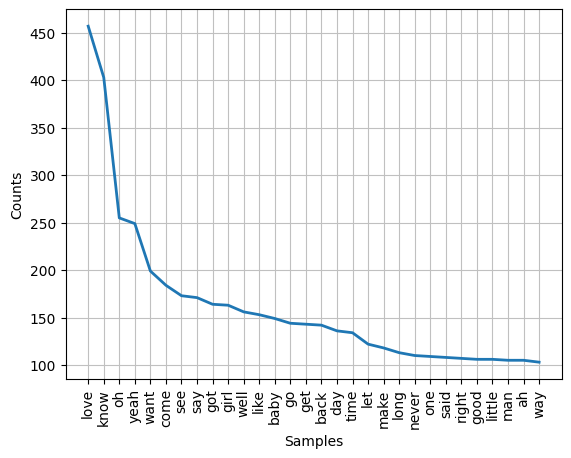

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [22]:
fdist = FreqDist(lemma_corpus.words())
fdist.plot(30, cumulative=False)

In [23]:
fdist.most_common(10)

[('love', 457),
 ('know', 403),
 ('oh', 255),
 ('yeah', 249),
 ('want', 199),
 ('come', 184),
 ('see', 173),
 ('say', 171),
 ('got', 164),
 ('girl', 163)]

In [24]:
print(f'Raw:\n{corpus.raw("another-girl.txt")[0:250]}')

Raw:
For I have got another girl, another girl
You're making me say that I've got nobody but you
But as from today well I've got somebody that's new
I ain't no fool and I don't take what I don't want
For I have got another girl, another girl
She's sweeter


In [25]:
print(f'Cleaned:\n{cleaned_corpus.raw("another-girl.txt")[0:250]}')

Cleaned:
got another girl another girl making say got nobody today well got somebody new fool take want got another girl another girl sweeter girls met quite nobody world telling time better stop got another girl another girl love till end thick thin always f


In [26]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def lemma_pos_corpus(input_corpus):
    for d in input_corpus.fileids():
        tokenize_str = word_tokenize(input_corpus.raw(d))
        lemmatized = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in tokenize_str]
        detokenise_str = TreebankWordDetokenizer().detokenize(lemmatized)
        filename = d
        filepath = os.path.join('lemma_pos_lyrics/', filename)
        outfile = open(filepath, 'w')
        outfile.write(detokenise_str)
        outfile.close()
    return 'Process complete!' 

In [27]:
lemma_pos_corpus(lemma_corpus)

'Process complete!'

In [28]:
lemma_pos_lyrics_corpus_path = 'lemma_pos_lyrics/'

lemma_pos_corpus = PlaintextCorpusReader(lemma_pos_lyrics_corpus_path, '.*\.txt')

print(f'{lemma_pos_corpus.fileids()}')

song = lemma_pos_corpus.words('two-of-us.txt')
song

['Anna-go-to-him.txt', 'I-saw-her-standing-there.txt', 'There-s-a-place.txt', 'a-day-in-the-life-live-in-amsterdam.txt', 'a-day-in-the-life.txt', 'a-hard-days-night.txt', 'a-taste-of-honey.txt', 'across-the-universe.txt', 'act-naturally.txt', 'ain-t-she-sweet.txt', 'all-ive-got-to-do.txt', 'all-my-loving.txt', 'all-things-must-pass.txt', 'all-together-now.txt', 'all-you-need-is-love.txt', 'and-i-love-her.txt', 'and-your-bird-can-sing.txt', 'another-girl.txt', 'ask-me-why.txt', 'baby-its-you.txt', 'baby-youre-a-rich-man.txt', 'babys-in-black.txt', 'back-in-the-ussr.txt', 'bad-boy.txt', 'because.txt', 'being-for-the-benefit-of-mr-kite.txt', 'besame-mucho.txt', 'birthday.txt', 'blackbird.txt', 'blue-jay-way.txt', 'boys.txt', 'cant-buy-me-love.txt', 'carry-that-weight.txt', 'chains.txt', 'come-together.txt', 'cry-baby-cry.txt', 'day-tripper.txt', 'dear-prudence.txt', 'devil-in-her-heart.txt', 'dig-a-pony.txt', 'dizzy-miss-lizzy.txt', 'do-you-want-to-know-a-secret.txt', 'doctor-robert.txt',

['two', 'u', 'rid', 'nowhere', 'spending', 'someone', ...]

In [29]:
corpus_info(lemma_pos_corpus)

Text corpus contains 218 files
Composed of 218 paragraphs and 218 sentences.
1.000 sentences per paragraph
Word count of 18563 with a vocabulary of 1989
lexical diversity is 9.333


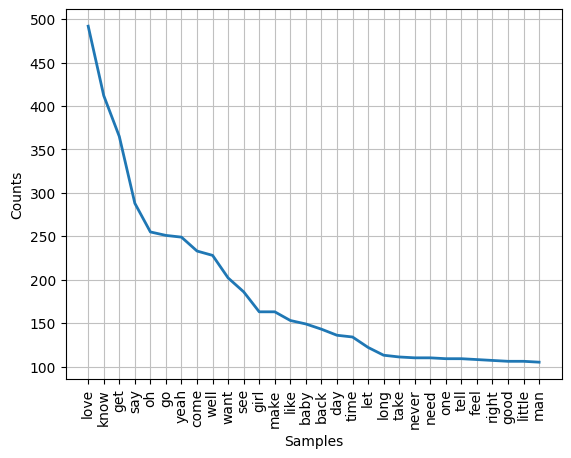

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [30]:
fdist = FreqDist(lemma_pos_corpus.words())
fdist.plot(30, cumulative=False)

In [31]:
fdist.most_common(10)

[('love', 492),
 ('know', 412),
 ('get', 365),
 ('say', 288),
 ('oh', 255),
 ('go', 251),
 ('yeah', 249),
 ('come', 233),
 ('well', 228),
 ('want', 202)]

In [32]:
print(f'Raw:\n{corpus.raw("another-girl.txt")[0:250]}')

Raw:
For I have got another girl, another girl
You're making me say that I've got nobody but you
But as from today well I've got somebody that's new
I ain't no fool and I don't take what I don't want
For I have got another girl, another girl
She's sweeter


In [33]:
print(f'Cleaned:\n{lemma_pos_corpus.raw("another-girl.txt")[0:250]}')

Cleaned:
get another girl another girl make say get nobody today well get somebody new fool take want get another girl another girl sweeter girl met quite nobody world tell time well stop get another girl another girl love till end thick thin always friend wa
